## 张量（Tensor）

- 0维张量（标量）：一个数，例如5
- 1维张量（向量）：一个数字列表，例如[1, 2, 3]
- 2维张量（矩阵）：类似表格或图像，例如[[1, 2], [3, 4]]
- 更高维的张量：如3维张量表示彩色图像（宽 x 高 x 颜色通道），4维张量用于批量处理多张图像 （批 x 宽 x 高 x 颜色通道）

**在深度学习中**
1. 输入数据：例如图像处理为 batch x 宽 x 高 x 通道 的4维张量
2. 模型参数
3. 中间计算
4. 损失函数

统一表示各类数据：
- 输入数据（图像、文本）-> 张量
- 神经网络的权重、偏置 -> 张量
- 中间激活值、输出结果 -> 张量
  
**避免了转换开销**

In [3]:
import torch

t1 = torch.tensor([1, 2, 3, 4])
t1

tensor([1, 2, 3, 4])

In [4]:
t2 = torch.tensor([[1, 2], [3, 4]])
t2

tensor([[1, 2],
        [3, 4]])

In [11]:
# 特殊方法创建张量

# 全0张量
t3 = torch.zeros(3, 3)

# 全1张量
t4 = torch.ones(2, 4)

# 随机张量
t5 = torch.rand(2, 2)
t5

tensor([[0.9262, 0.9437],
        [0.1697, 0.2542]])

In [15]:
## 张量和Numpy的转换
import numpy as np

# Pytorch转Numpy
t = torch.tensor([1, 2, 3])
np_arr = t.numpy()

# Numpy转张量
np_arr = np.array([4, 5, 6])
t_from_np = torch.from_numpy(np_arr)

In [17]:
t_from_np

tensor([4, 5, 6], dtype=torch.int32)

### Pytorch张量的矩阵乘积

**@运算符**
- 任意维度的张量（只要满足最后两个维度相等）
    - 最后一个维度长度必须相等
    - 最后两维之外的维度必须相同或者为1

In [20]:
A = torch.tensor([[1, 2, 3], [4, 5, 6]]) # （2，3）
B = torch.tensor([[7, 8], [9, 10], [11, 12]]) #（3，2）

C = A @ B
C

tensor([[ 58,  64],
        [139, 154]])

In [22]:
A = torch.randn(2, 3)

In [24]:
A

tensor([[ 0.3171,  0.2032, -0.7964],
        [ 0.9489,  0.1966, -0.3069]])

In [26]:
B = torch.randn(2, 4)

C = A @ B
C

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3 and 2x4)

In [ ]:
torch.matmul()

**torch.bmm(a,b)**

- tensor a的size为(b,h,w)
- tensor b的size为(b,w,m)
- 输出(b,h,m)

In [28]:
batch_size = 10

A_batch = torch.randn(batch_size, 2, 3) # 10 x 2 x 3
B_batch = torch.randn(batch_size, 3, 4) 
C = torch.bmm(A_batch, B_batch)
C.shape

torch.Size([10, 2, 4])

**torch.mm使用**
1. 仅适用于二维张量
2. 当输入为二维张量时：
    - torch.mm(A, B) = A @ B = torch.matmul(A, B)
3. 当输入为高维时：A @ B = torch.matmul(A, B)


**点积**
点积指两个向量的乘积（一维）：torch.dot(A_vector, B_vector)

## 线性回归 Liner Regression

**模型 Model**: y = x * w + b

**数据集 Dataset**：[Features] X, y(label -> 标签)

**损失函数Loss Function**： MSE -> （1/N）* Σ(y_hat-y_ture)^2

**优化器Optimizer**：Adam / SGD


**数据集 Dataset**
- 训练集（Training Set）
- 验证集（Validation Set）
- 测试集（Test Set）

**Feature**
1. 数值型（Continuous Features）
    - 数值型的特征可以连续变化：身高、体重、房子面积
    - 这些特征通常是可加性的，比如180cm 和 175cm 之间的 5cm 是有意义的，代表实际的身高差
2. 类别型（Categorical Features）
    - 又称为离散型特征，不能直接用数值表述：性别、眼睛颜色、房屋类型
    - 不能进行加减运算 -> 把类别特征转换成可以计算的数值，比如：0表示男性，1表示女性，或者用独热编码(One-Hot Encoding)，把多个类别都转换成多个0/1值
3. 特殊特征：高维数据、复杂特征
    - 图像数据
    - 语音数据
    - 激光雷达

**Loss Function**
- 均方误差（mean-square-error: MSE）
- 均绝对误差（MAE）：MAE = (1/N) * ∑ |Y_hat - Y_true|

**评价指标(Metrics)**
1. 准确率（Accuracy）: 用于分类任务
2. R^2（决定系数）：用于回归问题，范围在0-1之间
3. AUC（曲线下面积）


#### 模型训练流程
1. 准备数据：收集数据、整理成适合模型训练的格式
2. 选择特征：决定哪些特征对模型预测有帮助
3. 训练模型：输入数据，让模型调整参数，减小误差
4. 评估效果：用损失函数和评价指标
5. 优化模型：如果表现不好，调整参数或者换更好的特征

#### 优化器
> 优化器的核心目标是调整参数，使得损失函数最小化
>
- 计算误差
- 计算梯度：使用反向传播（Backpropagation）计算出损失对每个参数的影响
- 更新参数：根据梯度，调整参数，让模型的输出更接近目标

*数学公式表达*
W_new = W_old - learning_rate * gradient
b_new = b_old - learning_rate * gradient

- 梯度下降 SGD：每次朝减小误差的方向调整，但是步伐稳定，容易受局部最优困扰
- 动量优化
- Adam：结合了动量和自适应学习率，是目前最常用的优化器之一

In [ ]:
nn.Module

In [ ]:
nn.Parameter

### 数据预处理

> 人为筛选含有主观性，需要进行系统的筛选

**基于统计分析**
*我们可以计算每个特征（X）和目标变量（label/y）的相关性（correlation）*

*降维（Dimensionality Reduction）*
- PCA -> 通过数学方法，将高维数据转换为较少的几个主成分，同时尽可能保留数据的主要信息。
- 基于模型的特征选择方法：决策树、随机森林

常见的相关性计算方法包括：皮尔逊相关系数、斯皮尔曼相关系数、卡方检验、余弦相似度

**余弦相似度**
- 文本分析
- 推荐系统
- 特征筛选（如果特征数值已经归一化，它可以作为特征选择的指标之一）


**标准化（Standardization）和归一化（Normalization）**
- 标准化通常将数据转换为均值为0、标准差为1的分布
- 归一化指将数据缩放到0和1之间

In [25]:
# 余弦相似度
import numpy as np

# 定义特征 X 和目标变量 Y
X = np.array([50, 60, 70, 80, 90])
Y = np.array([200, 240, 280, 320, 360])

# 计算点积
dot_product = np.dot(X, Y)

# 计算范数
norm_X = np.linalg.norm(X)
norm_Y = np.linalg.norm(Y)

# 计算余弦相似度
cosine_similarity = dot_product / (norm_X * norm_Y)
cosine_similarity

0.9999999999999999

## 数据预处理 - 标准化

**为什么进行标准化？**
- 数据的尺度（scale）不同影响模型的训练效果，标准化的主要目的是让不同特征的数值范围接近，使模型更快收敛，提高训练效果
- 是否需要标准化，取决于：数据类型、优化方法和网络结构

**适合标准化的情况**
1. 输入数据有不同的尺度 -> 对输入数据进行 Z-score标准化（零均值单位方差），或者Min-Max归一化
2. 使用梯度下降优化时（SGD/Adam）
    - 特别适用于：线性回归、逻辑回归、神经网络（DNN/CNN/RNN）
3. 使用批量归一化
4. 防止梯度消失或者梯度爆炸

**可以先不使用标准化，观察模型的表现，再决定是否使用标准化**

In [64]:
import pandas as pd

df_train = pd.read_csv("data/boston_housing/train.csv").set_index("Id")
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
df_train.SalePrice

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [68]:
df_train.SalePrice.values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [70]:
max_value = df_train.SalePrice.values.max()
min_value = df_train.SalePrice.values.min()

max_value, min_value

(755000, 34900)

In [72]:
# 开始标准化
df_train.SalePrice.values - min_value

array([173600, 146600, 188600, ..., 231600, 107225, 112600], dtype=int64)

In [76]:
# 进行标准化 -> 获得新的数据，所有的数据的值都在[0, 1]之间
standard = (df_train.SalePrice.values - min_value) / (max_value - min_value)

In [80]:
max(standard), min(standard)

(1.0, 0.0)

In [89]:
def linear_regression(x: torch.tensor) -> torch.tensor:
    """ 线性回归函数 """
    weight = torch.rand(3, 5)
    bias = torch.rand(5)
    return x @ weight + bias

In [91]:
linear_regression(torch.rand(2, 3))

tensor([[0.8115, 1.2494, 1.4538, 0.8605, 0.9638],
        [1.0444, 1.3812, 1.2196, 1.1723, 1.1600]])

## 线性神经网络

**torch.nn.Parameter** -> tensor的子类，如果放进nn.Module里，Pytorch会自动识别它是一个需要优化的参数，并且在训练的过程中计算它的梯度，进而让优化器调整它的值

**nn.Module** -> 是pytorch所有神经网络模型的基类，它帮我们管理模型的参数，让参数不会在每次向前传播时被重置

**nn.Linear** -> 封装了线性变换，让代码更加简洁

In [87]:
def linear_neural_network(x: torch.tensor) -> torch.tensor:
    """ 线性神经网络运算函数 """
    weight = torch.nn.Parameter(torch.rand(3, 5))
    bias = torch.nn.Parameter(torch.rand(5))
    return x @ weight + bias

In [95]:
linear_neural_network(torch.rand(2, 3))

tensor([[0.5766, 1.5439, 1.0831, 0.7947, 1.0908],
        [0.6749, 1.9330, 1.1352, 1.0379, 1.5109]], grad_fn=<AddBackward0>)

In [98]:
import torch.nn as nn

class LinearNeuralNetwork(nn.Module):
    """ 线性神经网络 """
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.rand(in_features, out_features))
        self.bias = torch.nn.Parameter(torch.rand(out_features))
        
    def forward(self, x):
        return x @ self.weight + self.bias

In [100]:
model = LinearNeuralNetwork(in_features=3, out_features=5)

In [102]:
x = torch.rand(2, 3)
y = model(x) 
print(y.shape)

torch.Size([2, 5])


In [104]:
y

tensor([[1.0687, 0.4751, 1.1736, 1.0330, 0.2632],
        [1.6772, 1.4187, 2.2411, 1.0490, 1.2289]], grad_fn=<AddBackward0>)

In [106]:
model.weight, model.bias

(Parameter containing:
 tensor([[0.6726, 0.6552, 0.9089, 0.0017, 0.7120],
         [0.0851, 0.0736, 0.1588, 0.5183, 0.1281],
         [0.1058, 0.7341, 0.6482, 0.6889, 0.7495]], requires_grad=True),
 Parameter containing:
 tensor([0.9184, 0.2710, 0.8768, 0.4799, 0.0019], requires_grad=True))

In [108]:
class LinearNeuralNetwork(nn.Module):
    """ 线性神经网络 """
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features) # 线性变换层
        
    def forward(self, x):
        return self.linear(x)

### 逻辑回归模型

- 用于接近二分类问题
- 范围在[0, 1]（表示概率）
- 有激活函数 -> sigmoid，输出概率 p = sigmoid(w * x + b)


In [8]:
import torch.nn.functional as F

class LogisticRegression(torch.nn.Module):
    """ 逻辑回归模型 """
    def __init__(self):
        super().__init__()
        self.fc = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        """ 前向传播 """
        return F.sigmoid(self.fc(x))

In [13]:
# 生成数据集 dataset
x = torch.Tensor([[1.0], [2.0], [3.0]])
y = torch.Tensor([[0], [0], [1]])

In [15]:
model = LogisticRegression()
loss_func = torch.nn.BCELoss() # 二元交叉熵损失 -> 二分类问题
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [16]:
total_loss = []
for i in range(5000):
    # forward
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    
    # update
    optimizer.step()
    total_loss.append(loss.item())

In [17]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']= 'True'

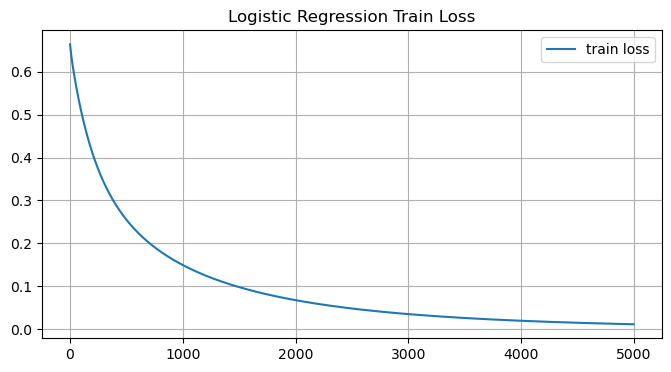

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(total_loss, label="train loss")
plt.title("Logistic Regression Train Loss")
plt.legend()
plt.grid()
plt.show()

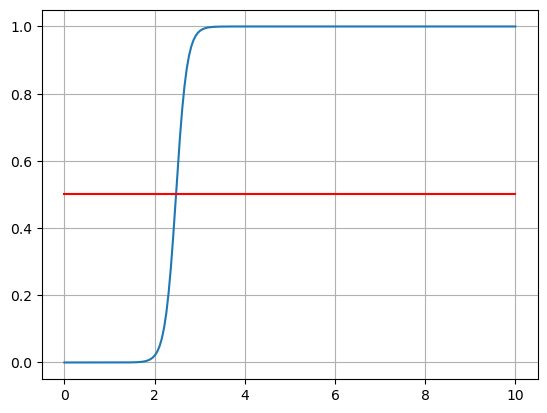

In [27]:
x_t = torch.Tensor(np.linspace(0, 10, 200)).view(200, 1)
y_hat = model(x_t)

plt.plot(x_t.data.numpy(), y_hat.data.numpy())
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.grid()

**激活函数**
- ReLU
- Sigmoid(S型函数)
- Tanh（双曲正切）

In [ ]:
f(x) = max(0, x)
F.relu(x)

## 多层感知机 MLP -> 多层线性神经网络

**什么是多层感知机？**
- 多层的线性变换 + 非线性的激活函数 的组合

In [ ]:
x.shape = (1, 7)

In [ ]:
# 第一层
Linear(7, 4)

# 加一层
Linear(4, 10)

# 再加一层
Linear(10, 5)

In [33]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(7, 4),
    nn.ReLU(),
    nn.Linear(4, 10),
    nn.ReLU(),
    nn.Linear(10, 5)
)

## MLP练习：预测学生是否通过考试

简单的二分类任务，根据学生的两门成绩（数学和英语），预测是否通过考试

- 输入：两个特征，取值范围[0, 100]
- 输出：是否通过(0表示不通过，1表示通过)
- 通过的定义：数学和英语的平均成绩大于60

### 1. 生成数据集
- X: 是我们的输入，100个学生，每个有两个成绩
- Y：我们的标签，0 或 1

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

# 设置随机种子，确保结果可以复现
torch.manual_seed(0)

X = torch.rand(100, 2) * 100 # 100行2列，每列的成绩在0-100之间
Y = ((X.mean(dim=1)) > 60).float().view(-1, 1) #dim1水平方向取中值后，与60比较得到一个布尔值张量，转为浮点，重塑为[n,1]的张量(-1为自动计算)

### 2. 定义MLP模型（2 -> 10 -> 5 -> 1）

In [23]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

### 3. 模型训练（Adam）

In [26]:
model = MLP()
loss_fc = nn.BCELoss() # 二元交叉熵损失 -> 二分类问题
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

losses = []
for epoch in range(500):
    # forward
    y_hat = model(X) # 前向传播
    loss = loss_fc(y_hat, Y) # 计算预测值与真实值之间的误差
    
    # backward
    optimizer.zero_grad() # 梯度清零
    loss.backward() # 反向传播
    
    # update
    optimizer.step() # 更新参数
    losses.append(loss.item()) # 记录损失值

### 4. 可视化训练损失

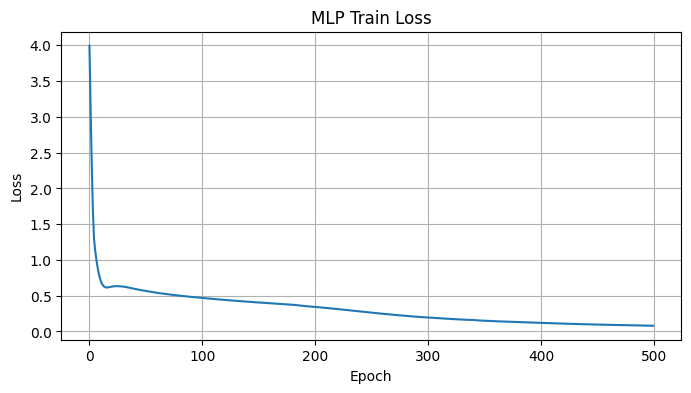

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(losses, label="train loss")
plt.title("MLP Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

### 5. 做预测 + 可视化边界

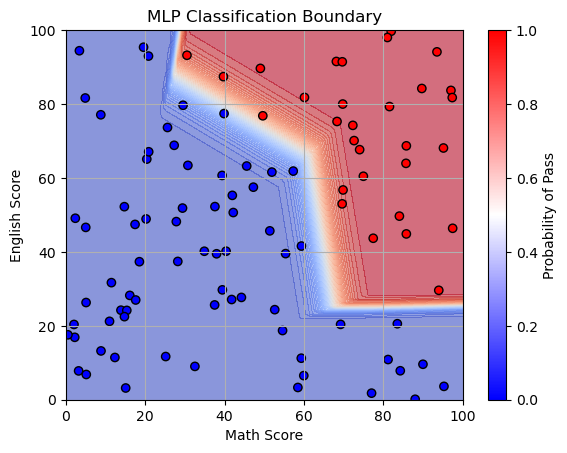

In [67]:
# 构建一个网格数据，用于可视化分类边界
xx, yy = torch.meshgrid(torch.linspace(0, 100, 100), torch.linspace(0, 100, 100), indexing='xy')
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
preds = model(grid).reshape(100, 100).detach().numpy()

plt.contourf(xx, yy, preds, levels=50, cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=Y.view(-1), cmap='bwr', edgecolor='k')
plt.xlabel("Math Score")
plt.ylabel("English Score")
plt.title("MLP Classification Boundary")
plt.colorbar(label="Probability of Pass")
plt.grid()
plt.show()